In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [3]:
#Data Overview
#Check the first few rows of each dataset to understand the structure
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
#Check for missing values
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
#Check for duplicate records
print(customers_df.duplicated().sum())
print(products_df.duplicated().sum())
print(transactions_df.duplicated().sum())

0
0
0


In [7]:
#Summary Statistics
#Numerical columns:
print(transactions_df.describe())
print(products_df.describe())

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [8]:
#Categorical columns:
print(customers_df['Region'].value_counts())
print(products_df['Category'].value_counts())

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


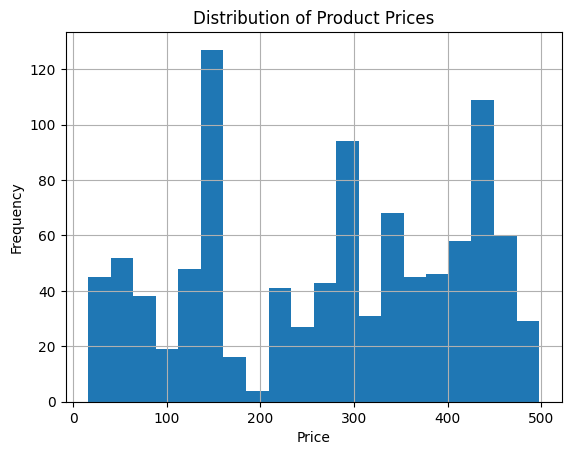

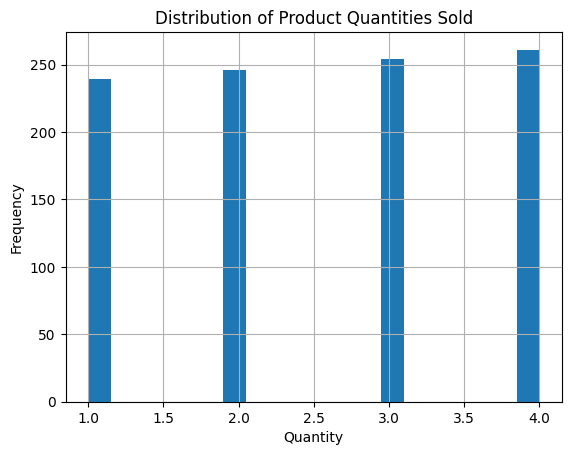

In [9]:
#Univariate Analysis

#Histograms for numerical columns:
transactions_df['Price'].hist(bins=20)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

transactions_df['Quantity'].hist(bins=20)
plt.title('Distribution of Product Quantities Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

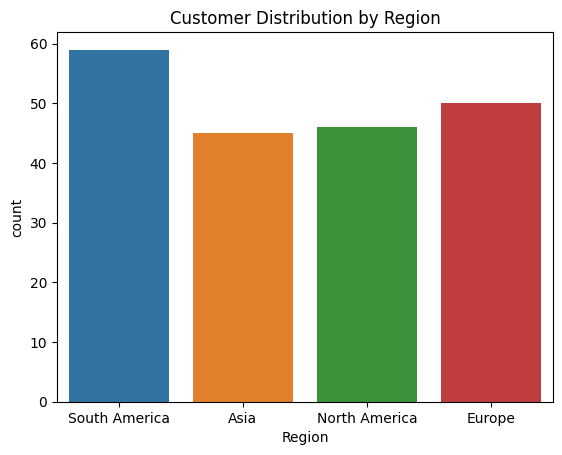

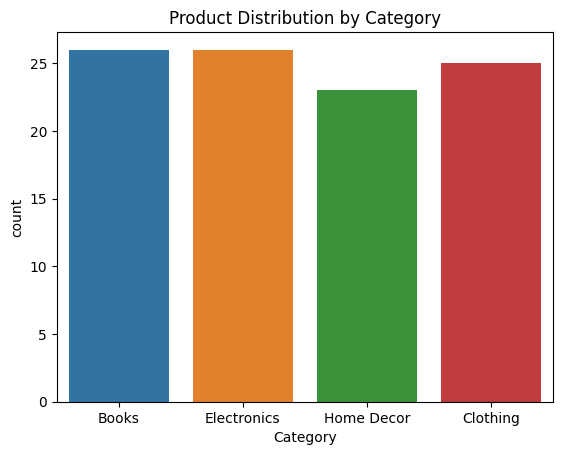

In [10]:
#Bar plots for categorical features
sns.countplot(x='Region', data=customers_df)
plt.title('Customer Distribution by Region')
plt.show()

sns.countplot(x='Category', data=products_df)
plt.title('Product Distribution by Category')
plt.show()

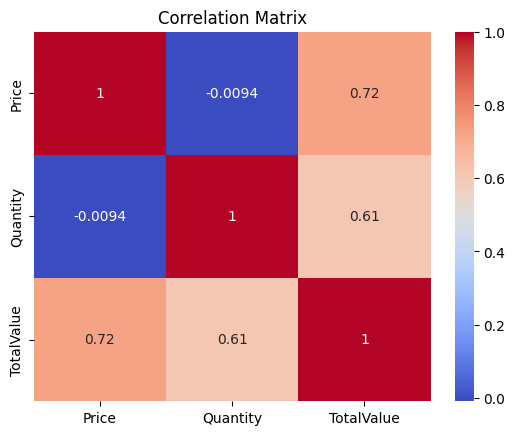

In [11]:
#Bivariate Analysis
#Correlation between numerical features:
# Correlation matrix
corr_matrix = transactions_df[['Price', 'Quantity', 'TotalValue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

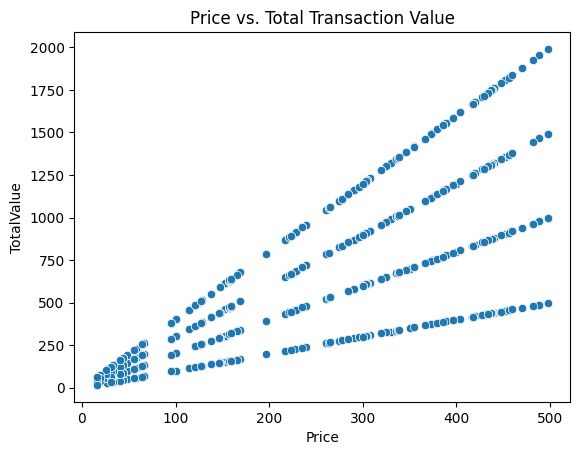

In [12]:
#Scatter plot of price vs. total transaction value:
sns.scatterplot(x='Price', y='TotalValue', data=transactions_df)
plt.title('Price vs. Total Transaction Value')
plt.show()

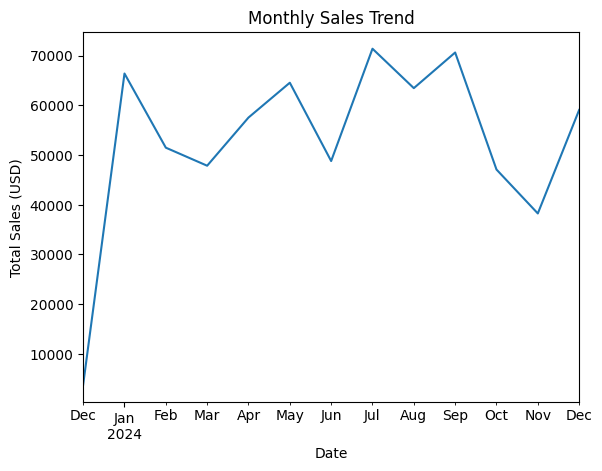

In [14]:
#Time Series Analysis
#Trend of transactions over time:
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df.set_index('TransactionDate', inplace=True)

# Monthly sales trend
monthly_sales = transactions_df.resample('M')['TotalValue'].sum()
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Date')
plt.show()

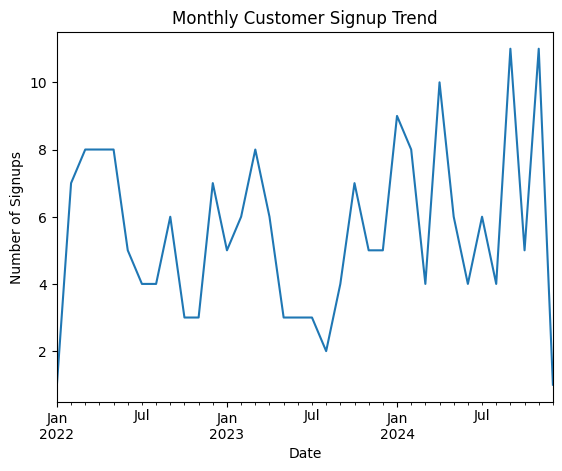

In [15]:
#Customer signup trend over time:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
signup_trend = customers_df.resample('M', on='SignupDate')['CustomerID'].count()
signup_trend.plot()
plt.title('Monthly Customer Signup Trend')
plt.ylabel('Number of Signups')
plt.xlabel('Date')
plt.show()

In [16]:
#Insightful Aggregations
#Top products by sales volume:
top_products = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = pd.merge(top_products, products_df[['ProductID', 'ProductName']], on='ProductID')
print(top_products)

  ProductID  Quantity            ProductName
0      P059        46        SoundWave Jeans
1      P054        46     SoundWave Cookbook
2      P029        45     TechPro Headphones
3      P079        43         ActiveWear Rug
4      P061        43    HomeSense Desk Lamp
5      P057        43  ActiveWear Smartphone
6      P048        43       TechPro Cookbook
7      P062        39        HomeSense Novel
8      P020        38      ActiveWear Jacket
9      P028        38    HomeSense Desk Lamp


In [17]:
#Average transaction value by region:
merged_df = pd.merge(transactions_df, customers_df[['CustomerID', 'Region']], on='CustomerID')
avg_transaction_value_region = merged_df.groupby('Region')['TotalValue'].mean()
print(avg_transaction_value_region)

Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64


In [18]:
#Revenue contribution by product category:
merged_df = pd.merge(transactions_df, products_df[['ProductID', 'Category']], on='ProductID')
revenue_by_category = merged_df.groupby('Category')['TotalValue'].sum()
print(revenue_by_category)

Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


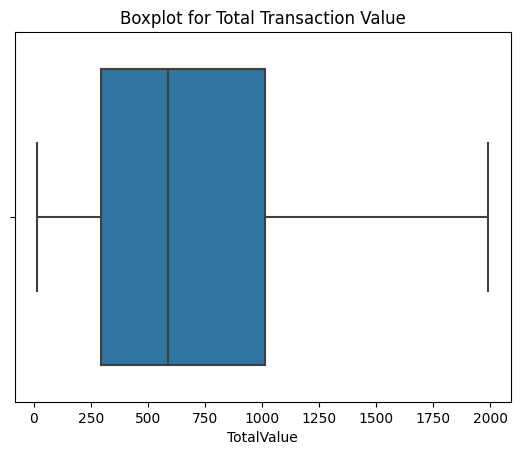

In [19]:
# Outliers Detection
#Boxplot for outliers in transaction value:
sns.boxplot(x=transactions_df['TotalValue'])
plt.title('Boxplot for Total Transaction Value')
plt.show()